In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#sys - systolic 
#po2 - partial pressure of oxygen
#fra - fragile
#bic - Bayesian Information Criterion, Brain Imaging Center
#cre - a family of germs
#loc - level of consciousness

In [3]:
df = pd.read_csv('icu.csv')
df.rename(columns={'loc':'lackoc'}, inplace=True)

In [7]:
df.columns

Index([u'Unnamed: 0', u'sta', u'age', u'sex', u'race', u'ser', u'can', u'crn',
       u'inf', u'cpr', u'sys', u'hra', u'pre', u'typ', u'fra', u'Unnamed: 14',
       u'po2', u'Unnamed: 16', u'ph', u'pco', u'bic', u'cre', u'lackoc',
       u'Unnamed: 22', u'Unnamed: 23'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 22','Unnamed: 23'],axis=1)

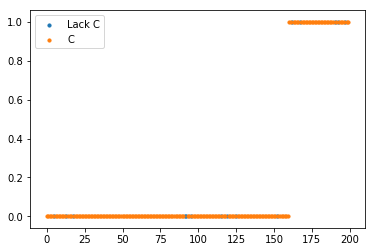

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
lackoc = df.loc[df.lackoc == 1]
n_lackoc = df.loc[df.lackoc == 0]
plt.scatter(lackoc.iloc[:, 0], lackoc.iloc[:, 1], s=10, label='Lack C')
plt.scatter(n_lackoc.iloc[:, 0], n_lackoc.iloc[:, 1], s=10, label='C')
plt.legend()
plt.show()

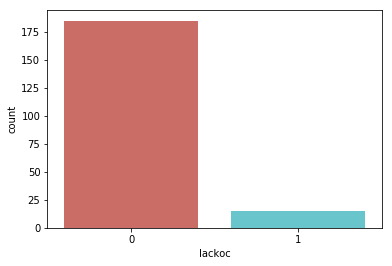

In [12]:
df['lackoc'].value_counts()
sns.countplot(x='lackoc',data=df,palette='hls')
plt.show() #Representing the Target column for binary classification

In [14]:
df = df.drop(['ser','po2','ph','fra'],axis=1)

In [16]:
col_mask=df.isnull().any(axis=0) #checking for Null Values
#print(col_mask)

In [17]:
df.rename( columns={'Unnamed: 0':'u00', 'Unnamed: 14':'u14', 'Unnamed: 16':'u16'}, inplace=True )

In [19]:
np.where(df.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [20]:
X1 = df.iloc[:, :-1]
y1 = df.iloc[:, -1]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=0)

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
# We need to manage the float64 error even after replacing the Null values from our dataframe

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[57,  0],
       [ 3,  0]])

Text(0.5,257.44,'Predicted label')

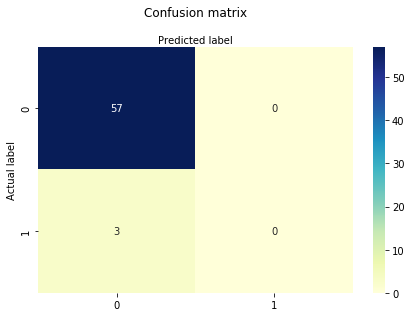

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()  
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
df.columns

Index([u'u00', u'sta', u'age', u'sex', u'race', u'can', u'crn', u'inf', u'cpr',
       u'sys', u'hra', u'pre', u'typ', u'u14', u'u16', u'pco', u'bic', u'cre',
       u'lackoc'],
      dtype='object')

In [32]:
formula = 'lackoc ~ sta+age+sex+race+can+crn+cpr+sys+hra+pre+typ+pco+bic'
#PatsyError: numbers besides '0' and '1' are only allowed with **

In [31]:
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())
# The glm() function fits generalized linear models, a class of models that includes logistic regression.
# We must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 lackoc   No. Observations:                  200
Model:                            GLM   Df Residuals:                      186
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.019
Date:                Mon, 22 Apr 2019   Deviance:                       68.037
Time:                        00:08:17   Pearson chi2:                     81.8
No. Iterations:                    24   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0497      2.557     -0.019      0.984      -5.061       4.962
sta            0.2576      0.854      0.302      0.7